In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
import joblib

---
## Phase 1: Data Preparation
This phase is all about getting our data ready for machine learning. We start by loading the main dataset, which contains radiomic features and patient information. The first step in cleaning is to remove irrelevant columns like folder paths, diagnostic versions, and certain shape features that aren't useful for our analysis.

Next, we segregate the data by gender. This is important because we'll be performing separate, stratified splits for male and female patients to ensure the distribution of "Bone Age" (our target variable) is maintained within each group. This helps prevent bias and improves model reliability.

After separating by gender, we define our predictor variables (X) and the target variable (y) ("Bone Age"). Then, using a stratified shuffle split, we divide both the female and male datasets into training, validation, and test sets. This stratification guarantees that the age distribution in each subset closely mirrors the original dataset, which is crucial for robust model evaluation.

Finally, we combine these gender-specific subsets to create unified training, validation, and test sets. To prepare the features for our models, we apply standardization, scaling them to a consistent range. We conclude this phase by visualizing the distribution of the target variable across our new sets, confirming that the data is well-prepared and balanced for the next steps in our machine learning pipeline.

---

In [ ]:
import pandas as pd

merged_df=pd.read_csv('..\data\dicom_radiomics_merged_3dslicer.csv', sep=',')

In [3]:
merged_df["Edad Ósea(días)"]

0      4929
1      2738
2      4017
3      4383
4      3226
       ... 
474    4017
475    1461
476    2677
477    1946
478    5113
Name: Edad Ósea(días), Length: 479, dtype: int64

In [4]:

data_df=merged_df.copy()
data_df.drop(columns=["Folder"], inplace=True)
#data_df.drop(columns=["Folder_x"], inplace=True)
#data_df.drop(columns=["Folder_y"], inplace=True)
#data_df.drop(columns=["diagnostics_Versions_PyRadiomics_2"], inplace=True)

data_df.drop(columns=["diagnostics_Versions_PyRadiomics"], inplace=True)
data_df.drop(columns=["Indicativo"], inplace=True)
data_df.drop(columns=["original_shape_Flatness"], inplace=True)
data_df.drop(columns=["original_shape_LeastAxisLength"], inplace=True)

masculinos = data_df[data_df["Género(0; 1)"] == 0].copy()
femeninos = data_df[data_df["Género(0; 1)"] == 1].copy()

# Copia y limpieza del dataframe
data_df = merged_df.copy()
data_df.drop(columns=["Indicativo", "original_shape_Flatness", 
                        "original_shape_LeastAxisLength", 
                        "diagnostics_Versions_PyRadiomics", 
                        "Folder"], inplace=True)

# Variables predictoras y objetivo
y = data_df["Edad Ósea(días)"].copy().values
X = data_df.drop(columns=["Edad Ósea(días)"]).copy().values


In [5]:


y_f = femeninos["Edad Ósea(días)"].copy().values
X_f = femeninos.drop(columns=["Edad Ósea(días)"]).values

#splot
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_f)
y_binned = pd.qcut(y_series, q=7, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_f, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]
    

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_fg = x_train.copy()
x_test_fg = x_test.copy()
x_validation_fg = x_validation.copy()

y_train_f = y_train.copy()
y_test_f = y_test.copy()
y_validation_f = y_validation.copy()

x_train_f = x_train.copy()
x_test_f = x_test.copy()
x_validation_f = x_validation.copy()


y_m = masculinos["Edad Ósea(días)"].copy().values
X_m = masculinos.drop(columns=["Edad Ósea(días)"]).copy().values

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_m)
y_binned = pd.qcut(y_series, q=10, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_m, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]


print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_mg = x_train.copy()
x_test_mg = x_test.copy()
x_validation_mg = x_validation.copy()

y_train_m = y_train.copy()
y_test_m = y_test.copy()
y_validation_m = y_validation.copy()

x_train_m = x_train.copy()
x_test_m = x_test.copy()
x_validation_m = x_validation.copy()


# Combinar los conjuntos de entrenamiento
x_train = np.concatenate([x_train_f, x_train_m], axis=0)
y_train = np.concatenate([y_train_f, y_train_m], axis=0)

# Combinar los conjuntos de validación
x_validation = np.concatenate([x_validation_f, x_validation_m], axis=0)
y_validation = np.concatenate([y_validation_f, y_validation_m], axis=0)

# Combinar los conjuntos de prueba
x_test = np.concatenate([x_test_f, x_test_m], axis=0)
y_test = np.concatenate([y_test_f, y_test_m], axis=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_validation = scaler.transform(x_validation)


print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

The dimension of x_train is (156, 100)
The dimension of x_test is (49, 100)
The dimension of x_train is (149, 100)
The dimension of x_test is (47, 100)
The dimension of x_train is (305, 100)
The dimension of x_test is (96, 100)


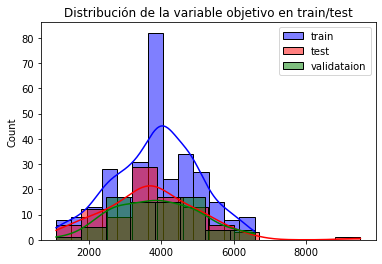

In [6]:
import seaborn as sns
sns.histplot(y_train, color='blue', label='train', kde=True)
sns.histplot(y_test, color='red', label='test', kde=True)
sns.histplot(y_validation, color='green', label='validataion', kde=True)
plt.legend()
plt.title("Distribución de la variable objetivo en train/test")
plt.show()

In [7]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))


Train set size:  305
Validation set size:  78
Test set size:  96
Total:  479


---
## Phase 2: Model Definition and Training

This phase is dedicated to defining, training, and evaluating various machine learning models to predict bone age. The process is systematically applied across three scenarios: first for a general model (using the combined male and female data), then specifically for male data, and finally for female data. This allows for the development of both universal and gender-specific predictive capabilities.

---

In [8]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(x_train, y_train)

#predict
#prediction = lr.predict(x_test)

#actual
actual = y_test

train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.9458648515546354
The test score for lr model is -1.4836666246713115

Ridge Model............................................

The train score for ridge model is 0.8909745921597321
The test score for ridge model is 0.8053201508337835


In [9]:
#Lasso regression model

print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.8747637091557596
The test score for ls model is 0.8108953534365017


In [10]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000,100000], random_state=0).fit(x_train, y_train)


#score
print(lasso_cv.score(x_train, y_train))
print(lasso_cv.score(x_test, y_test))

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1600794.6840554103, tolerance: 32681.938479918033
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10651280.692412704, tolerance: 32681.938479918033
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12745515.345662836, tolerance: 32681.938479918033
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective 

0.8747637091557596
0.8108953534365017


c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12155961.043629348, tolerance: 32701.46583114754
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12089887.160193324, tolerance: 32701.46583114754
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12039966.261686303, tolerance: 32701.46583114754
  tol, rng, random, positive)


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

metrics=[]
# Función para calcular y mostrar métricas
def calcular_metricas(y_true, y_pred, model, conjunto=''):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics.append((model,conjunto, mae, mse, rmse, r2))
    print(f"--- Métricas para {conjunto} ---")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print()
# Mostrar métricas
y_test_pred=lasso_cv.predict(x_test)
y_train_pred=lasso_cv.predict(x_train)
y_validation_pred=lasso_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test',model='LassoCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation')


--- Métricas para Train ---
MAE:  320.0886
MSE:  166844.6626
RMSE: 408.4662
R²:   0.8748

--- Métricas para Test ---
MAE:  382.1207
MSE:  330819.1129
RMSE: 575.1688
R²:   0.8109

--- Métricas para Validation ---
MAE:  305.8279
MSE:  159393.7070
RMSE: 399.2414
R²:   0.8825



In [12]:
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'R2'])

In [13]:
metrics_df

,Model,Set,MAE,MSE,RMSE,R2
0,LassoCV Train,Train,320.088569,166844.662646,408.466232,0.874764
1,LassoCV Test,Test,382.120656,330819.112875,575.168769,0.810895
2,LassoCV Validation,Validation,305.827897,159393.706991,399.241414,0.882550


In [14]:
# Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv.coef_) 
print ( "Interceptar:" , lasso_cv.intercept_)

Características seleccionadas: [108.16954876 964.23889184   0.           0.          83.40706648
  30.4227834    0.           0.           0.           0.
 -50.81210768   0.           6.08671353   0.          -0.
  -0.          -0.           0.          64.95424442  24.63773269
 -67.43841348   0.          -0.          -0.           0.
  -0.           0.          -0.           0.          -0.
  -0.          -0.          -0.          -0.          -0.
   1.50053712  -0.          -0.          -0.          -0.
   0.          -0.           0.           0.           0.
  -7.30676899  -0.           0.          -0.           0.
  -0.           0.           0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.           0.           0.           0.           0.
   0.          -0.           0.          -0.           0.
  -0.          -0.          -0.          -0.           0.
  -6.38148511  22.6089446    0.          17.32938115  48.84976672
   0.          -0

In [15]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features_g = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_g = selected_features_g.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_g)


Características seleccionadas:
                                              Feature  Coefficient
1                              Edad Cronológica(días)   964.238892
0                                        Género(0; 1)   108.169549
4              original_shape_Maximum2DDiameterColumn    83.407066
20                        original_firstorder_Maximum   -67.438413
18             original_firstorder_InterquartileRange    64.954244
10                          original_shape_Sphericity   -50.812108
79     original_glszm_SizeZoneNonUniformityNormalized    48.849767
5                 original_shape_Maximum2DDiameterRow    30.422783
19                       original_firstorder_Kurtosis    24.637733
76       original_glszm_LargeAreaLowGrayLevelEmphasis    22.608945
78               original_glszm_SizeZoneNonUniformity    17.329381
94  original_gldm_LargeDependenceHighGrayLevelEmph...    -7.653452
45                                 original_glcm_Imc2    -7.306769
75      original_glszm_LargeAre

In [16]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(x_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(x_test, y_test)))

The train score for ridge model is 0.8909745921597307
The test score for ridge model is 0.8053201508337053


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mostrar métricas 
y_test_pred=ridge_cv.predict(x_test)
y_train_pred=ridge_cv.predict(x_train)
y_validation_pred=ridge_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation')


--- Métricas para Train ---
MAE:  302.2990
MSE:  145247.8931
RMSE: 381.1140
R²:   0.8910

--- Métricas para Test ---
MAE:  371.2733
MSE:  340572.3559
RMSE: 583.5858
R²:   0.8053

--- Métricas para Validation ---
MAE:  291.7407
MSE:  139033.9510
RMSE: 372.8726
R²:   0.8976



In [18]:
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'R2'])
metrics_df

,Model,Set,MAE,MSE,RMSE,R2
0,LassoCV Train,Train,320.088569,166844.662646,408.466232,0.874764
1,LassoCV Test,Test,382.120656,330819.112875,575.168769,0.810895
2,LassoCV Validation,Validation,305.827897,159393.706991,399.241414,0.882550
3,RidgeCV Train,Train,302.298965,145247.893149,381.114016,0.890975
4,RidgeCV Test,Test,371.273256,340572.355921,583.585774,0.805320
5,RidgeCV Validation,Validation,291.740687,139033.951037,372.872567,0.897552


In [19]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
'''
# define model
model = XGBRegressor(objective ='reg:linear', 
                  n_estimators = 100, seed = 123) 
# define model evaluation method
cv = RepeatedKFold(n_splits=100, n_repeats=5, random_state=3)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
'''

"\n# define model\nmodel = XGBRegressor(objective ='reg:linear', \n                  n_estimators = 100, seed = 123) \n# define model evaluation method\ncv = RepeatedKFold(n_splits=100, n_repeats=5, random_state=3)\n# evaluate model\nscores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)\n# force scores to be positive\nscores = absolute(scores)\nprint('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )\n"

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_g = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'subsample': 1.0}


In [25]:
y_test_pred=model_xgb_g.predict(x_test)
y_train_pred=model_xgb_g.predict(x_train)
y_validation_pred=model_xgb_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation')

--- Métricas para Train ---
MAE:  0.0018
MSE:  0.0000
RMSE: 0.0026
R²:   1.0000

--- Métricas para Test ---
MAE:  180.7069
MSE:  257918.0981
RMSE: 507.8564
R²:   0.8526

--- Métricas para Validation ---
MAE:  80.7994
MSE:  45581.1367
RMSE: 213.4974
R²:   0.9664



In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_g = grid_search.best_estimator_
y_pred = mlp_g.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.0, 'model__l2_rate': 0.001, 'model__learning_rate': 0.001, 'model__units_1': 128, 'model__units_2': 64}
MAE: 418.6901054382324
MSE: 477863.3501311818


In [ ]:
y_test_pred=mlp_g.predict(x_test)
y_train_pred=mlp_g.predict(x_train)
y_validation_pred=mlp_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation')

--- Métricas para Train ---
MAE:  263.1538
MSE:  155871.3680
RMSE: 394.8055
R²:   0.8830

--- Métricas para Test ---
MAE:  418.6901
MSE:  477863.3501
RMSE: 691.2766
R²:   0.7268

--- Métricas para Validation ---
MAE:  313.5852
MSE:  203226.2591
RMSE: 450.8062
R²:   0.8503



In [ ]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_g = grid_search.best_estimator_
y_pred = svr_g.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 10, 'svr__epsilon': 1, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
364.7176573268131

📊 MAE en test set: 412.14 días


In [ ]:
y_test_pred=svr_g.predict(x_test)
y_train_pred=svr_g.predict(x_train)
y_validation_pred=svr_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation')

--- Métricas para Train ---
MAE:  342.2129
MSE:  210307.0562
RMSE: 458.5925
R²:   0.8421

--- Métricas para Test ---
MAE:  412.1447
MSE:  397314.5404
RMSE: 630.3289
R²:   0.7729

--- Métricas para Validation ---
MAE:  347.4046
MSE:  198237.5628
RMSE: 445.2388
R²:   0.8539



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_g = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_g.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': 7, 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 10}
Best CV R²: 0.8939344654105635
Test R²: 0.7843053567050458
Test MAE: 385.68930921052635
Test RMSE: 614.2764646335625


In [ ]:
y_test_pred=decision_tree_g.predict(x_test)
y_train_pred=decision_tree_g.predict(x_train)
y_validation_pred=decision_tree_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation')

--- Métricas para Train ---
MAE:  147.4113
MSE:  40833.7383
RMSE: 202.0736
R²:   0.9693

--- Métricas para Test ---
MAE:  385.6893
MSE:  377335.5750
RMSE: 614.2765
R²:   0.7843

--- Métricas para Validation ---
MAE:  296.9487
MSE:  189851.0266
RMSE: 435.7190
R²:   0.8601



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_g = grid_search_rf.best_estimator_
y_pred_rf = random_forest_g.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': 10, 'rf__max_features': 0.7, 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best CV R²: 0.923542816928318
Test R²: 0.858113811619596
Test MAE: 265.4399159192398
Test RMSE: 498.21208427302344


In [ ]:
y_test_pred=random_forest_g.predict(x_test)
y_train_pred=random_forest_g.predict(x_train)
y_validation_pred=random_forest_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation')

--- Métricas para Train ---
MAE:  84.7681
MSE:  14789.7814
RMSE: 121.6132
R²:   0.9889

--- Métricas para Test ---
MAE:  265.4399
MSE:  248215.2809
RMSE: 498.2121
R²:   0.8581

--- Métricas para Validation ---
MAE:  177.1745
MSE:  62365.4755
RMSE: 249.7308
R²:   0.9540



In [30]:
scaler_m = StandardScaler()
x_train = scaler_m.fit_transform(x_train_m)
x_test = scaler_m.transform(x_test_m)
x_validation = scaler_m.transform(x_validation_m)

y_train = y_train_m.copy()
y_test = y_test_m.copy()
y_validation = y_validation_m.copy()

# Escalar características
x_train_g = scaler.transform(x_train_mg)
x_test_g = scaler.transform(x_test_mg)
x_validation_g = scaler.transform(x_validation_mg)

In [ ]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))

Train set size:  149
Validation set size:  38
Test set size:  47
Total:  234


In [ ]:
y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation Masculino')

--- Métricas para Train ---
MAE:  334.0894
MSE:  183465.8104
RMSE: 428.3291
R²:   0.8697

--- Métricas para Test ---
MAE:  339.0690
MSE:  176559.9993
RMSE: 420.1904
R²:   0.8619

--- Métricas para Validation ---
MAE:  273.0391
MSE:  153908.1755
RMSE: 392.3113
R²:   0.8596



In [ ]:
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation Masculino')

--- Métricas para Train ---
MAE:  309.0414
MSE:  153857.0096
RMSE: 392.2461
R²:   0.8907

--- Métricas para Test ---
MAE:  338.9172
MSE:  171030.6037
RMSE: 413.5585
R²:   0.8662

--- Métricas para Validation ---
MAE:  259.7630
MSE:  131511.1234
RMSE: 362.6446
R²:   0.8801



In [ ]:
ridge_cv_m = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)
lasso_cv_m = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000], random_state=0).fit(x_train, y_train)

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 940985.5022086427, tolerance: 16475.571631932773
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4784718.462125772, tolerance: 16475.571631932773
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5227951.474568786, tolerance: 16475.571631932773
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did

In [ ]:

y_test_pred=ridge_cv_m.predict(x_test)
y_train_pred=ridge_cv_m.predict(x_train)
y_validation_pred=ridge_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_M Validation Masculino')

print("Lasso Masculino")
y_test_pred=lasso_cv_m.predict(x_test)
y_train_pred=lasso_cv_m.predict(x_train)
y_validation_pred=lasso_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_M Validation Masculino')

--- Métricas para Train ---
MAE:  301.4459
MSE:  148085.2256
RMSE: 384.8184
R²:   0.8948

--- Métricas para Test ---
MAE:  428.3432
MSE:  340613.7741
RMSE: 583.6213
R²:   0.7335

--- Métricas para Validation ---
MAE:  288.5763
MSE:  157552.7306
RMSE: 396.9291
R²:   0.8563

Lasso Masculino
--- Métricas para Train ---
MAE:  310.3806
MSE:  160290.6303
RMSE: 400.3631
R²:   0.8862

--- Métricas para Test ---
MAE:  417.0158
MSE:  312489.9466
RMSE: 559.0080
R²:   0.7555

--- Métricas para Validation ---
MAE:  297.0606
MSE:  176301.0018
RMSE: 419.8821
R²:   0.8392



In [ ]:
#  Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv_m.coef_) 
print ( "Interceptar:" , lasso_cv_m.intercept_)

Características seleccionadas: [  54.48218879  965.45988827    0.            0.           86.27458386
    0.            0.            0.            0.            0.
 -105.82327881    0.          114.09322209    0.          -48.59257509
   -0.           -0.            0.          105.1793169    70.66125218
  -94.45199275    0.           -0.           -0.            0.
   -0.            0.           -0.            0.           -0.
   -0.           -0.           -0.           -0.         -111.9409212
   17.50877108   -0.           -0.           -0.           -0.
    0.           -0.           -0.            0.            0.
   -0.           -0.            0.           -0.            0.
   -0.            0.            0.           -0.           -0.
   -0.           -0.           -0.           -0.           -0.
   -2.13517365   -0.            0.            0.            0.
    0.           -0.            0.           -0.           -0.
   -0.           -0.           -0.           -0.        

In [ ]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv_m.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features_m = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_m = selected_features_m.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_m)


Características seleccionadas:
                                              Feature  Coefficient
1                              Edad Cronológica(días)   965.459888
78               original_glszm_SizeZoneNonUniformity   123.644250
12                  original_shape_SurfaceVolumeRatio   114.093222
34                    original_glcm_ClusterProminence  -111.940921
10                          original_shape_Sphericity  -105.823279
18             original_firstorder_InterquartileRange   105.179317
20                        original_firstorder_Maximum   -94.451993
4              original_shape_Maximum2DDiameterColumn    86.274584
19                       original_firstorder_Kurtosis    70.661252
86                    original_gldm_DependenceEntropy    59.661995
0                                        Género(0; 1)    54.482189
14                   original_firstorder_10Percentile   -48.592575
94  original_gldm_LargeDependenceHighGrayLevelEmph...   -47.944741
85                        origi

In [29]:
y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Masculino')

--- Métricas para Train ---
MAE:  0.0018
MSE:  0.0000
RMSE: 0.0026
R²:   1.0000

--- Métricas para Test ---
MAE:  237.8746
MSE:  440344.2580
RMSE: 663.5844
R²:   0.7947

--- Métricas para Validation ---
MAE:  75.6819
MSE:  44075.1283
RMSE: 209.9408
R²:   0.9698



In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_m = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8}


In [33]:
y_test_pred=model_xgb_m.predict(x_test)
y_train_pred=model_xgb_m.predict(x_train)
y_validation_pred=model_xgb_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_m Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_m Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_m Validation Masculino')

--- Métricas para Train ---
MAE:  0.0021
MSE:  0.0000
RMSE: 0.0026
R²:   1.0000

--- Métricas para Test ---
MAE:  354.8954
MSE:  184399.7200
RMSE: 429.4179
R²:   0.8557

--- Métricas para Validation ---
MAE:  331.3926
MSE:  179845.1461
RMSE: 424.0815
R²:   0.8360



In [ ]:
y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Masculino')

--- Métricas para Train ---
MAE:  275.5911
MSE:  180024.3807
RMSE: 424.2928
R²:   0.8721

--- Métricas para Test ---
MAE:  336.9541
MSE:  209401.7163
RMSE: 457.6043
R²:   0.8362

--- Métricas para Validation ---
MAE:  309.0042
MSE:  203804.7197
RMSE: 451.4474
R²:   0.8141



In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_m = grid_search.best_estimator_
y_pred = mlp_m.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.0, 'model__l2_rate': 0.0, 'model__learning_rate': 0.001, 'model__units_1': 128, 'model__units_2': 64}
MAE: 455.8402930726396
MSE: 325831.1867164104


In [ ]:
y_test_pred=mlp_m.predict(x_test)
y_train_pred=mlp_m.predict(x_train)
y_validation_pred=mlp_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_m Validation')

--- Métricas para Train ---
MAE:  294.9064
MSE:  171350.7555
RMSE: 413.9454
R²:   0.8783

--- Métricas para Test ---
MAE:  455.8403
MSE:  325831.1867
RMSE: 570.8162
R²:   0.7451

--- Métricas para Validation ---
MAE:  468.6293
MSE:  425015.4974
RMSE: 651.9321
R²:   0.6123



In [ ]:
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Masculino')

--- Métricas para Train ---
MAE:  363.2974
MSE:  235127.1622
RMSE: 484.8991
R²:   0.8330

--- Métricas para Test ---
MAE:  346.5947
MSE:  179710.1303
RMSE: 423.9223
R²:   0.8594

--- Métricas para Validation ---
MAE:  297.3080
MSE:  157910.2304
RMSE: 397.3792
R²:   0.8560



In [ ]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_m = grid_search.best_estimator_
y_pred = svr_m.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 1, 'svr__epsilon': 1, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
755.7825553909886

📊 MAE en test set: 669.11 días


In [ ]:
y_test_pred=svr_m.predict(x_test)
y_train_pred=svr_m.predict(x_train)
y_validation_pred=svr_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_m Validation')

--- Métricas para Train ---
MAE:  664.7146
MSE:  717032.6959
RMSE: 846.7778
R²:   0.4907

--- Métricas para Test ---
MAE:  669.1063
MSE:  737697.3505
RMSE: 858.8931
R²:   0.4229

--- Métricas para Validation ---
MAE:  562.8669
MSE:  531533.2087
RMSE: 729.0632
R²:   0.5152



In [ ]:
y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Masculino')

--- Métricas para Train ---
MAE:  147.6338
MSE:  38661.7396
RMSE: 196.6259
R²:   0.9725

--- Métricas para Test ---
MAE:  312.4590
MSE:  219598.6272
RMSE: 468.6135
R²:   0.8282

--- Métricas para Validation ---
MAE:  324.0927
MSE:  213882.9966
RMSE: 462.4749
R²:   0.8049



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_m = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_m.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': 5, 'tree__max_leaf_nodes': 20, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 10}
Best CV R²: 0.7815325038421331
Test R²: 0.6815823528563041
Test MAE: 515.028841607565
Test RMSE: 637.9986375362026


In [ ]:
y_test_pred=decision_tree_m.predict(x_test)
y_train_pred=decision_tree_m.predict(x_train)
y_validation_pred=decision_tree_m.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_m Validation')

--- Métricas para Train ---
MAE:  221.9438
MSE:  88548.2476
RMSE: 297.5706
R²:   0.9371

--- Métricas para Test ---
MAE:  515.0288
MSE:  407042.2615
RMSE: 637.9986
R²:   0.6816

--- Métricas para Validation ---
MAE:  452.6115
MSE:  333460.7361
RMSE: 577.4606
R²:   0.6959



In [ ]:
y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Masculino')

--- Métricas para Train ---
MAE:  88.6980
MSE:  17052.7310
RMSE: 130.5861
R²:   0.9879

--- Métricas para Test ---
MAE:  212.4565
MSE:  77979.3067
RMSE: 279.2478
R²:   0.9390

--- Métricas para Validation ---
MAE:  164.8323
MSE:  60590.0766
RMSE: 246.1505
R²:   0.9447



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_m = grid_search_rf.best_estimator_
y_pred_rf = random_forest_m.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': 10, 'rf__max_features': 'auto', 'rf__max_leaf_nodes': 20, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best CV R²: 0.8366076298597825
Test R²: 0.8249742903822535
Test MAE: 401.1573534519728
Test RMSE: 473.01194742340425


In [ ]:
y_test_pred=random_forest_m.predict(x_test)
y_train_pred=random_forest_m.predict(x_train)
y_validation_pred=random_forest_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_m Validation')

--- Métricas para Train ---
MAE:  204.2783
MSE:  72446.2768
RMSE: 269.1585
R²:   0.9485

--- Métricas para Test ---
MAE:  401.1574
MSE:  223740.3024
RMSE: 473.0119
R²:   0.8250

--- Métricas para Validation ---
MAE:  325.8188
MSE:  213443.3994
RMSE: 461.9994
R²:   0.8053



In [34]:
#Scale features f
scaler_f = StandardScaler()
x_train = scaler_f.fit_transform(x_train_f)
x_test = scaler_f.transform(x_test_f)
x_validation = scaler_f.transform(x_validation_f)

y_train = y_train_f.copy()
y_test = y_test_f.copy()
y_validation = y_validation_f.copy()

# Escalar características
x_train_g = scaler.transform(x_train_fg)
x_test_g = scaler.transform(x_test_fg)
x_validation_g = scaler.transform(x_validation_fg)


In [ ]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))

Train set size:  156
Validation set size:  40
Test set size:  49
Total:  245


In [ ]:
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Ridge Train', model='RidgeCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Ridge Test', model='RidgeCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Ridge Validation', model='RidgeCV Validation Femenino')

y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Lasso Train', model='LassoCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Lasso Test', model='LassoCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Lasso Validation', model='LassoCV Validation Femenino')

--- Métricas para Ridge Train ---
MAE:  295.8591
MSE:  137025.0832
RMSE: 370.1690
R²:   0.8900

--- Métricas para Ridge Test ---
MAE:  402.3087
MSE:  503194.0366
RMSE: 709.3617
R²:   0.7653

--- Métricas para Ridge Validation ---
MAE:  322.1195
MSE:  146180.6373
RMSE: 382.3358
R²:   0.8997

--- Métricas para Lasso Train ---
MAE:  306.7159
MSE:  150969.3356
RMSE: 388.5477
R²:   0.8788

--- Métricas para Lasso Test ---
MAE:  423.4151
MSE:  478781.9361
RMSE: 691.9407
R²:   0.7767

--- Métricas para Lasso Validation ---
MAE:  336.9772
MSE:  164604.9619
RMSE: 405.7154
R²:   0.8871



In [ ]:

ridge_cv_f = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)
lasso_cv_f = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000], random_state=2,max_iter=10000,).fit(x_train, y_train)

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207383.59876144677, tolerance: 15498.510125
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1277431.3342609284, tolerance: 15498.510125
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3409654.1799520184, tolerance: 15498.510125
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. 

In [ ]:
print ( "Modelo Femenino RidgeCV")

y_test_pred=ridge_cv_f.predict(x_test)
y_train_pred=ridge_cv_f.predict(x_train)
y_validation_pred=ridge_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_F Validation')


print ( "Modelo Femenino LassoCV")
y_test_pred=lasso_cv_f.predict(x_test)
y_train_pred=lasso_cv_f.predict(x_train)
y_validation_pred=lasso_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_F Validation')

Modelo Femenino RidgeCV
--- Métricas para Train ---
MAE:  293.5395
MSE:  139326.2567
RMSE: 373.2643
R²:   0.8882

--- Métricas para Test ---
MAE:  449.3255
MSE:  564796.8819
RMSE: 751.5297
R²:   0.7366

--- Métricas para Validation ---
MAE:  397.5359
MSE:  223243.1566
RMSE: 472.4861
R²:   0.8469

Modelo Femenino LassoCV
--- Métricas para Train ---
MAE:  300.3039
MSE:  145887.0913
RMSE: 381.9517
R²:   0.8829

--- Métricas para Test ---
MAE:  439.0500
MSE:  501815.5147
RMSE: 708.3894
R²:   0.7660

--- Métricas para Validation ---
MAE:  371.9004
MSE:  190284.3845
RMSE: 436.2160
R²:   0.8695



In [ ]:
#  Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv_f.coef_) 
print ( "Interceptar:" , lasso_cv_f.intercept_)

Características seleccionadas: [ 1.37022887e+02  9.52108058e+02  0.00000000e+00  0.00000000e+00
  4.21991454e+01  2.75445203e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.44385245e+01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.03816262e+02  4.80859825e+01
 -1.86690213e+01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  6.23918994e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.0000000

In [ ]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv_f.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_f = selected_features.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_f)


Características seleccionadas:
                                              Feature  Coefficient
1                              Edad Cronológica(días)   952.108058
0                                        Género(0; 1)   137.022887
18             original_firstorder_InterquartileRange   103.816262
10                          original_shape_Sphericity   -54.438524
19                       original_firstorder_Kurtosis    48.085982
4              original_shape_Maximum2DDiameterColumn    42.199145
95  original_gldm_LargeDependenceLowGrayLevelEmphasis    41.932147
75      original_glszm_LargeAreaHighGrayLevelEmphasis   -34.442733
5                 original_shape_Maximum2DDiameterRow    27.544520
20                        original_firstorder_Maximum   -18.669021
88    original_gldm_DependenceNonUniformityNormalized    12.637558
47                                 original_glcm_Idmn     6.239190
76       original_glszm_LargeAreaLowGrayLevelEmphasis     1.358393
85                        origi

In [ ]:
dtrain_reg = xgb.DMatrix(x_train_g, y_train)
dtest_reg = xgb.DMatrix(x_test_g, y_test)
dvalidation_reg = xgb.DMatrix(x_validation_g, y_validation)

In [ ]:
y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Femenino')

--- Métricas para Train ---
MAE:  0.0021
MSE:  0.0000
RMSE: 0.0030
R²:   1.0000

--- Métricas para Test ---
MAE:  302.7170
MSE:  644466.2964
RMSE: 802.7866
R²:   0.6995

--- Métricas para Validation ---
MAE:  97.9358
MSE:  67569.6488
RMSE: 259.9416
R²:   0.9536



In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_f = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.6}


In [36]:
y_test_pred=model_xgb_f.predict(x_test)
y_train_pred=model_xgb_f.predict(x_train)
y_validation_pred=model_xgb_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_f Validation')

--- Métricas para Train ---
MAE:  72.7014
MSE:  7992.9201
RMSE: 89.4031
R²:   0.9936

--- Métricas para Test ---
MAE:  482.5910
MSE:  672785.8974
RMSE: 820.2353
R²:   0.6863

--- Métricas para Validation ---
MAE:  413.6677
MSE:  250073.2696
RMSE: 500.0733
R²:   0.8285



In [ ]:
y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Femenino')

--- Métricas para Train ---
MAE:  251.2744
MSE:  132802.1395
RMSE: 364.4203
R²:   0.8934

--- Métricas para Test ---
MAE:  497.0899
MSE:  735367.3654
RMSE: 857.5356
R²:   0.6571

--- Métricas para Validation ---
MAE:  317.9372
MSE:  202676.7215
RMSE: 450.1963
R²:   0.8610



In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_f = grid_search.best_estimator_
y_pred = mlp_f.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.3, 'model__l2_rate': 0.001, 'model__learning_rate': 0.001, 'model__units_1': 128, 'model__units_2': 64}
MAE: 548.0879130460778
MSE: 896326.157954043


In [ ]:
y_test_pred=mlp_f.predict(x_test)
y_train_pred=mlp_f.predict(x_train)
y_validation_pred=mlp_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_f Validation')

--- Métricas para Train ---
MAE:  295.4611
MSE:  155812.5744
RMSE: 394.7310
R²:   0.8750

--- Métricas para Test ---
MAE:  548.0879
MSE:  896326.1580
RMSE: 946.7450
R²:   0.5820

--- Métricas para Validation ---
MAE:  444.8177
MSE:  339138.6956
RMSE: 582.3562
R²:   0.7674



In [ ]:
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Femenino')

--- Métricas para Train ---
MAE:  322.0744
MSE:  186600.6730
RMSE: 431.9730
R²:   0.8502

--- Métricas para Test ---
MAE:  475.0191
MSE:  606037.1378
RMSE: 778.4839
R²:   0.7174

--- Métricas para Validation ---
MAE:  394.9964
MSE:  236548.5287
RMSE: 486.3625
R²:   0.8377



In [ ]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_f = grid_search.best_estimator_
y_pred = svr_f.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
406.83479220025555

📊 MAE en test set: 514.60 días


In [ ]:
y_test_pred=svr_f.predict(x_test)
y_train_pred=svr_f.predict(x_train)
y_validation_pred=svr_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_f Validation')

--- Métricas para Train ---
MAE:  355.0245
MSE:  229370.5997
RMSE: 478.9265
R²:   0.8159

--- Métricas para Test ---
MAE:  514.5983
MSE:  668921.2243
RMSE: 817.8760
R²:   0.6881

--- Métricas para Validation ---
MAE:  451.0136
MSE:  312253.8190
RMSE: 558.7968
R²:   0.7858



In [ ]:
y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Femenino')

--- Métricas para Train ---
MAE:  147.1988
MSE:  42908.2755
RMSE: 207.1431
R²:   0.9656

--- Métricas para Test ---
MAE:  455.9306
MSE:  528634.2800
RMSE: 727.0724
R²:   0.7535

--- Métricas para Validation ---
MAE:  271.1620
MSE:  167020.6550
RMSE: 408.6816
R²:   0.8854



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_f = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_f.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': 5, 'tree__max_leaf_nodes': 10, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 2}
Best CV R²: 0.7614234423180984
Test R²: 0.7214589107581015
Test MAE: 541.5169951222247
Test RMSE: 772.850939142585


In [ ]:
y_test_pred=decision_tree_f.predict(x_test)
y_train_pred=decision_tree_f.predict(x_train)
y_validation_pred=decision_tree_f.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_f Validation')

--- Métricas para Train ---
MAE:  272.4534
MSE:  124814.9509
RMSE: 353.2916
R²:   0.8998

--- Métricas para Test ---
MAE:  541.5170
MSE:  597298.5741
RMSE: 772.8509
R²:   0.7215

--- Métricas para Validation ---
MAE:  432.4483
MSE:  275509.2711
RMSE: 524.8898
R²:   0.8110



In [ ]:
y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Femenino')

--- Métricas para Train ---
MAE:  81.0145
MSE:  12628.3744
RMSE: 112.3760
R²:   0.9899

--- Métricas para Test ---
MAE:  316.2607
MSE:  411502.8480
RMSE: 641.4849
R²:   0.8081

--- Métricas para Validation ---
MAE:  188.8995
MSE:  64052.1044
RMSE: 253.0852
R²:   0.9561



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_f = grid_search_rf.best_estimator_
y_pred_rf = random_forest_f.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': 5, 'rf__max_features': 'auto', 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best CV R²: 0.8386444770233703
Test R²: 0.7409720280818765
Test MAE: 486.0739508337542
Test RMSE: 745.2885288592738


In [ ]:
y_test_pred=random_forest_f.predict(x_test)
y_train_pred=random_forest_f.predict(x_train)
y_validation_pred=random_forest_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_f Validation')

--- Métricas para Train ---
MAE:  199.1939
MSE:  64058.2713
RMSE: 253.0974
R²:   0.9486

--- Métricas para Test ---
MAE:  486.0740
MSE:  555454.9912
RMSE: 745.2885
R²:   0.7410

--- Métricas para Validation ---
MAE:  371.4973
MSE:  218755.1754
RMSE: 467.7127
R²:   0.8499



---
## Phase 3: Results Summary

This final phase compiles and presents the performance metrics of all trained models, both general and gender-specific. The goal is to provide a comprehensive overview of how well each model predicts bone age across different datasets (training, test, and validation) and to highlight which models perform best for the overall population, males, and females. It also includes steps for saving the trained models and scalers for future use.

---

In [ ]:
print(metrics)

[('LassoCV Train', 'Train', 320.0885685046694, 166844.66264563028, 408.4662319526919, 0.8747637091557596), ('LassoCV Test', 'Test', 382.12065588887344, 330819.1128749781, 575.1687690365134, 0.8108953534365017), ('LassoCV Validation', 'Validation', 305.8278973626186, 159393.7069908686, 399.24141442348963, 0.8825495192729153), ('RidgeCV Train', 'Train', 302.2989649984122, 145247.89314892545, 381.1140159439501, 0.8909745921597307), ('RidgeCV Test', 'Test', 371.2732563593068, 340572.35592147306, 583.5857742624241, 0.8053201508337053), ('RidgeCV Validation', 'Validation', 291.7406866004894, 139033.9510373703, 372.8725667535362, 0.8975517622683774), ('XGBoost Train', 'Train', 0.0020735943903688525, 9.65531732215256e-06, 0.0031073006488192543, 0.9999999999927526), ('XGBoost Test', 'Test', 228.22524388631186, 380221.9411163658, 616.6213920359605, 0.7826554361819159), ('XGBoost Validation', 'Validation', 99.6093499599359, 66943.96255452014, 258.7353136982274, 0.9506718255554795), ('KerasRegress

In [ ]:


y_f = femeninos["Edad Ósea(días)"].copy().values
X_f = femeninos.drop(columns=["Edad Ósea(días)"]).values

#splot
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_f)
y_binned = pd.qcut(y_series, q=7, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_f, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]
    

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_fg = x_train.copy()
x_test_fg = x_test.copy()
x_validation_fg = x_validation.copy()

y_train_f = y_train.copy()
y_test_f = y_test.copy()
y_validation_f = y_validation.copy()

x_train_f = x_train.copy()
x_test_f = x_test.copy()
x_validation_f = x_validation.copy()


y_m = masculinos["Edad Ósea(días)"].copy().values
X_m = masculinos.drop(columns=["Edad Ósea(días)"]).copy().values

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_m)
y_binned = pd.qcut(y_series, q=10, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_m, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]


print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_mg = x_train.copy()
x_test_mg = x_test.copy()
x_validation_mg = x_validation.copy()

y_train_m = y_train.copy()
y_test_m = y_test.copy()
y_validation_m = y_validation.copy()

x_train_m = x_train.copy()
x_test_m = x_test.copy()
x_validation_m = x_validation.copy()


# Combinar los conjuntos de entrenamiento
x_train = np.concatenate([x_train_f, x_train_m], axis=0)
y_train = np.concatenate([y_train_f, y_train_m], axis=0)

# Combinar los conjuntos de validación
x_validation = np.concatenate([x_validation_f, x_validation_m], axis=0)
y_validation = np.concatenate([y_validation_f, y_validation_m], axis=0)

# Combinar los conjuntos de prueba
x_test = np.concatenate([x_test_f, x_test_m], axis=0)
y_test = np.concatenate([y_test_f, y_test_m], axis=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_validation = scaler.transform(x_validation)

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape)) 


metrics=[]
# Función para calcular y mostrar métricas
def calcular_metricas(y_true, y_pred, model, conjunto=''):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics.append((model,conjunto, mae, mse, rmse, r2))
    print(f"--- Métricas para {conjunto} ---")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print()
# Mostrar métricas
y_test_pred=lasso_cv.predict(x_test)
y_train_pred=lasso_cv.predict(x_train)
y_validation_pred=lasso_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test',model='LassoCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mostrar métricas 
y_test_pred=ridge_cv.predict(x_test)
y_train_pred=ridge_cv.predict(x_train)
y_validation_pred=ridge_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation')


y_test_pred=model_xgb_g.predict(x_test)
y_train_pred=model_xgb_g.predict(x_train)
y_validation_pred=model_xgb_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation')


y_test_pred=mlp_g.predict(x_test)
y_train_pred=mlp_g.predict(x_train)
y_validation_pred=mlp_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation')
y_test_pred=svr_g.predict(x_test)
y_train_pred=svr_g.predict(x_train)
y_validation_pred=svr_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation')
y_test_pred=decision_tree_g.predict(x_test)
y_train_pred=decision_tree_g.predict(x_train)
y_validation_pred=decision_tree_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation')
y_test_pred=random_forest_g.predict(x_test)
y_train_pred=random_forest_g.predict(x_train)
y_validation_pred=random_forest_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation')

print(f"Total de registros masculinos: {len(masculinos)}")
print(f"Total de registros femeninos: {len(femeninos)}")

scaler_m = StandardScaler()
x_train = scaler_m.fit_transform(x_train_m)
x_test = scaler_m.transform(x_test_m)
x_validation = scaler_m.transform(x_validation_m)

y_train = y_train_m.copy()
y_test = y_test_m.copy()
y_validation = y_validation_m.copy()

# Escalar características
x_train_g = scaler.transform(x_train_mg)
x_test_g = scaler.transform(x_test_mg)
x_validation_g = scaler.transform(x_validation_mg)

# Mostrar métricas para train y test



y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation Masculino')
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation Masculino')

y_test_pred=ridge_cv_m.predict(x_test)
y_train_pred=ridge_cv_m.predict(x_train)
y_validation_pred=ridge_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_M Validation Masculino')

print("Lasso Masculino")
y_test_pred=lasso_cv_m.predict(x_test)
y_train_pred=lasso_cv_m.predict(x_train)
y_validation_pred=lasso_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_M Validation Masculino')

y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Masculino')

y_test_pred=model_xgb_m.predict(x_test)
y_train_pred=model_xgb_m.predict(x_train)
y_validation_pred=model_xgb_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_m Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_m Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_m Validation Masculino')

y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Masculino')

y_test_pred=mlp_m.predict(x_test)
y_train_pred=mlp_m.predict(x_train)
y_validation_pred=mlp_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_m Validation')
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Masculino')

y_test_pred=svr_m.predict(x_test)
y_train_pred=svr_m.predict(x_train)
y_validation_pred=svr_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_m Validation')

y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Masculino')

y_test_pred=decision_tree_m.predict(x_test)
y_train_pred=decision_tree_m.predict(x_train)
y_validation_pred=decision_tree_m.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_m Validation')

y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Masculino')

y_test_pred=random_forest_m.predict(x_test)
y_train_pred=random_forest_m.predict(x_train)
y_validation_pred=random_forest_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_m Validation')


scaler_f = StandardScaler()
x_train = scaler_m.fit_transform(x_train_f)
x_test = scaler_m.transform(x_test_f)
x_validation = scaler_m.transform(x_validation_f)

y_train = y_train_f.copy()
y_test = y_test_f.copy()
y_validation = y_validation_f.copy()

# Escalar características
x_train_g = scaler.transform(x_train_fg) 
x_test_g = scaler.transform(x_test_fg)
x_validation_g = scaler.transform(x_validation_fg)


y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Ridge Train', model='RidgeCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Ridge Test', model='RidgeCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Ridge Validation', model='RidgeCV Validation Femenino')

y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Lasso Train', model='LassoCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Lasso Test', model='LassoCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Lasso Validation', model='LassoCV Validation Femenino')

print ( "Modelo Femenino RidgeCV")

y_test_pred=ridge_cv_f.predict(x_test)
y_train_pred=ridge_cv_f.predict(x_train)
y_validation_pred=ridge_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_F Validation')


print ( "Modelo Femenino LassoCV")
y_test_pred=lasso_cv_f.predict(x_test)
y_train_pred=lasso_cv_f.predict(x_train)
y_validation_pred=lasso_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_F Validation')

y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Femenino')

import xgboost as xgb
dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)

y_test_pred=model_xgb_f.predict(x_test)
y_train_pred=model_xgb_f.predict(x_train)
y_validation_pred=model_xgb_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_f Validation')

y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Femenino')

y_test_pred=mlp_f.predict(x_test)
y_train_pred=mlp_f.predict(x_train)
y_validation_pred=mlp_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_f Validation')

y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Femenino')
y_test_pred=svr_f.predict(x_test)
y_train_pred=svr_f.predict(x_train)
y_validation_pred=svr_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_f Validation')

y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Femenino')

y_test_pred=decision_tree_f.predict(x_test)
y_train_pred=decision_tree_f.predict(x_train)
y_validation_pred=decision_tree_f.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_f Validation')

y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Femenino')

y_test_pred=random_forest_f.predict(x_test)
y_train_pred=random_forest_f.predict(x_train)
y_validation_pred=random_forest_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_f Validation')


The dimension of x_train is (156, 100)
The dimension of x_test is (49, 100)
The dimension of x_train is (149, 100)
The dimension of x_test is (47, 100)
The dimension of x_train is (305, 100)
The dimension of x_test is (96, 100)
--- Métricas para Train ---
MAE:  320.0886
MSE:  166844.6626
RMSE: 408.4662
R²:   0.8748

--- Métricas para Test ---
MAE:  382.1207
MSE:  330819.1129
RMSE: 575.1688
R²:   0.8109

--- Métricas para Validation ---
MAE:  305.8279
MSE:  159393.7070
RMSE: 399.2414
R²:   0.8825

--- Métricas para Train ---
MAE:  302.2990
MSE:  145247.8931
RMSE: 381.1140
R²:   0.8910

--- Métricas para Test ---
MAE:  371.2733
MSE:  340572.3559
RMSE: 583.5858
R²:   0.8053

--- Métricas para Validation ---
MAE:  291.7407
MSE:  139033.9510
RMSE: 372.8726
R²:   0.8976

--- Métricas para Train ---
MAE:  0.0021
MSE:  0.0000
RMSE: 0.0031
R²:   1.0000

--- Métricas para Test ---
MAE:  228.2252
MSE:  380221.9411
RMSE: 616.6214
R²:   0.7827

--- Métricas para Validation ---
MAE:  99.6093
MSE:  6

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

columnas = ['Modelo', 'Tipo', 'mae', 'mse', 'rmse', 'r2']
df = pd.DataFrame(metrics, columns=columnas)



In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
for modelo in df["Modelo"]:
    print(modelo)

LassoCV Train
LassoCV Test
LassoCV Validation
RidgeCV Train
RidgeCV Test
RidgeCV Validation
XGBoost Train
XGBoost Test
XGBoost Validation
KerasRegressor Train
KerasRegressor Test
KerasRegressor Validation
SVR Train
SVR Test
SVR Validation
Decision Tree Train
Decision Tree Test
Decision Tree Validation
Random Forest Train
Random Forest Test
Random Forest Validation
LassoCV Train Masculino
LassoCV Test Masculino
LassoCV Validation Masculino
RidgeCV Train Masculino
RidgeCV Test Masculino
RidgeCV Validation Masculino
RidgeCV_M Train Masculino
RidgeCV_M Test Masculino
RidgeCV_M Validation Masculino
LassoCV_M Train Masculino
LassoCV_M Test Masculino
LassoCV_M Validation Masculino
XGBoost Train Masculino
XGBoost Test Masculino
XGBoost Validation Masculino
XGBoost_m Train Masculino
XGBoost_m Test Masculino
XGBoost_m Validation Masculino
KerasRegressor Train Masculino
KerasRegressor Test Masculino
KerasRegressor Validation Masculino
KerasRegressor_m Train
KerasRegressor_m Test
KerasRegressor_m 

In [ ]:
df

,Modelo,Tipo,mae,mse,rmse,r2
0,LassoCV Train,Train,320.088569,166844.662646,408.466232,0.874764
1,LassoCV Test,Test,382.120656,330819.112875,575.168769,0.810895
2,LassoCV Validation,Validation,305.827897,159393.706991,399.241414,0.882550
3,RidgeCV Train,Train,302.298965,145247.893149,381.114016,0.890975
4,RidgeCV Test,Test,371.273256,340572.355921,583.585774,0.805320
5,RidgeCV Validation,Validation,291.740687,139033.951037,372.872567,0.897552
6,XGBoost Train,Train,0.002074,0.000010,0.003107,1.000000
7,XGBoost Test,Test,228.225244,380221.941116,616.621392,0.782655
8,XGBoost Validation,Validation,99.609350,66943.962555,258.735314,0.950672
9,KerasRegressor Train,Train,263.153757,155871.368039,394.805481,0.883000


In [ ]:
import pandas as pd

# Suponiendo que ya tenés un DataFrame llamado `df`

# Filtro 1: Modelos generales (sin "Masculino", "Femenino", "_m", "_f")
df_generales = df[~df["Modelo"].str.contains("Masculino|Femenino|_m|_f|_M|_F", regex=True)]


# Filtro 3: Modelos con sufijos "_m" o "_f"
df_genero_guionbajo = df[df["Modelo"].str.contains(r"_m|_f|_M|_F", regex=True)]

# Filtro 2: Modelos con "Masculino" o "Femenino" al final (puede tener espacios en medio)
df_genero_texto = df[
    (df["Modelo"].str.contains(r"(Masculino|Femenino)$", regex=True)) &
    (~df["Modelo"].str.contains(r"_m|_f|_M|_F", regex=True))
]



# Mostrar conteo de cada uno
print("Modelos generales:", len(df_generales))
print("Modelos con género (texto):", len(df_genero_texto))
print("Modelos con género (_m/_f):", len(df_genero_guionbajo))


Modelos generales: 21
Modelos con género (texto): 42
Modelos con género (_m/_f): 42


c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
for modelo in df_generales["Modelo"]:
    print(modelo)
    

LassoCV Train
LassoCV Test
LassoCV Validation
RidgeCV Train
RidgeCV Test
RidgeCV Validation
XGBoost Train
XGBoost Test
XGBoost Validation
KerasRegressor Train
KerasRegressor Test
KerasRegressor Validation
SVR Train
SVR Test
SVR Validation
Decision Tree Train
Decision Tree Test
Decision Tree Validation
Random Forest Train
Random Forest Test
Random Forest Validation


In [ ]:
for modelo in df_genero_guionbajo["Modelo"]:
    print(modelo)

RidgeCV_M Train Masculino
RidgeCV_M Test Masculino
RidgeCV_M Validation Masculino
LassoCV_M Train Masculino
LassoCV_M Test Masculino
LassoCV_M Validation Masculino
XGBoost_m Train Masculino
XGBoost_m Test Masculino
XGBoost_m Validation Masculino
KerasRegressor_m Train
KerasRegressor_m Test
KerasRegressor_m Validation
SVR_m Train
SVR_m Test
SVR_m Validation
Decision Tree_m Train
Decision Tree_m Test
Decision Tree_m Validation
Random Forest_m Train
Random Forest_m Test
Random Forest_m Validation
RidgeCV_F Train
RidgeCV_F Test
RidgeCV_F Validation
LassoCV_F Train
LassoCV_F Test
LassoCV_F Validation
XGBoost_f Train
XGBoost_f Test
XGBoost_f Validation
KerasRegressor_f Train
KerasRegressor_f Test
KerasRegressor_f Validation
SVR_f Train
SVR_f Test
SVR_f Validation
Decision Tree_f Train
Decision Tree_f Test
Decision Tree_f Validation
Random Forest_f Train
Random Forest_f Test
Random Forest_f Validation


In [ ]:
for modelo in df_genero_texto["Modelo"]:
    print(modelo)

LassoCV Train Masculino
LassoCV Test Masculino
LassoCV Validation Masculino
RidgeCV Train Masculino
RidgeCV Test Masculino
RidgeCV Validation Masculino
XGBoost Train Masculino
XGBoost Test Masculino
XGBoost Validation Masculino
KerasRegressor Train Masculino
KerasRegressor Test Masculino
KerasRegressor Validation Masculino
SVR Train Masculino
SVR Test Masculino
SVR Validation Masculino
Decision Tree Train Masculino
Decision Tree Test Masculino
Decision Tree Validation Masculino
Random Forest Train Masculino
Random Forest Test Masculino
Random Forest Validation Masculino
RidgeCV Train Femenino
RidgeCV Test Femenino
RidgeCV Validation Femenino
LassoCV Train Femenino
LassoCV Test Femenino
LassoCV Validation Femenino
XGBoost Train Femenino
XGBoost Test Femenino
XGBoost Validation Femenino
KerasRegressor Train Femenino
KerasRegressor Test Femenino
KerasRegressor Validation Femenino
SVR Train Femenino
SVR Test Femenino
SVR Validation Femenino
Decision Tree Train Femenino
Decision Tree Test F

In [ ]:
print(df_genero_guionbajo)

                             Modelo        Tipo         mae            mse  \
27        RidgeCV_M Train Masculino       Train  301.445868  148085.225616   
28         RidgeCV_M Test Masculino        Test  428.343173  340613.774133   
29   RidgeCV_M Validation Masculino  Validation  288.576263  157552.730580   
30        LassoCV_M Train Masculino       Train  310.380575  160290.630296   
31         LassoCV_M Test Masculino        Test  417.015779  312489.946583   
32   LassoCV_M Validation Masculino  Validation  297.060648  176301.001800   
36        XGBoost_m Train Masculino       Train    5.014389      48.080131   
37         XGBoost_m Test Masculino        Test  374.227651  221653.463934   
38   XGBoost_m Validation Masculino  Validation  308.198319  151991.204575   
42           KerasRegressor_m Train       Train  294.906409  171350.755541   
43            KerasRegressor_m Test        Test  455.840293  325831.186716   
44      KerasRegressor_m Validation  Validation  468.629279  425

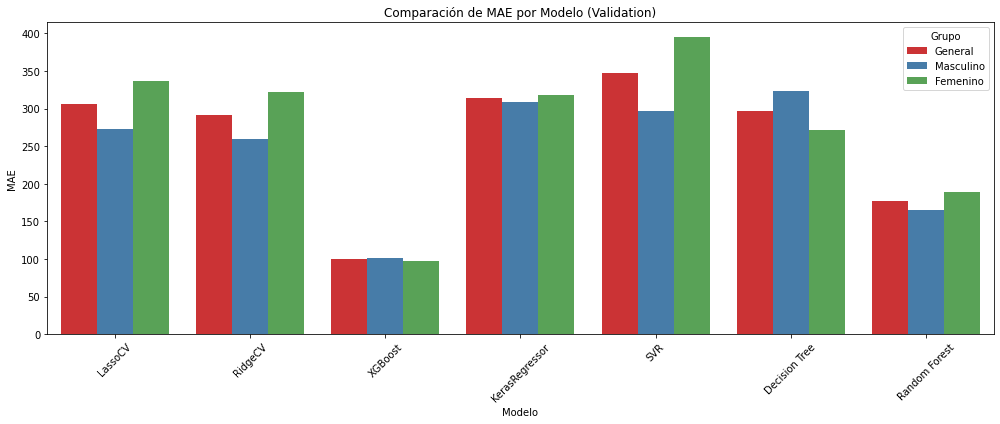

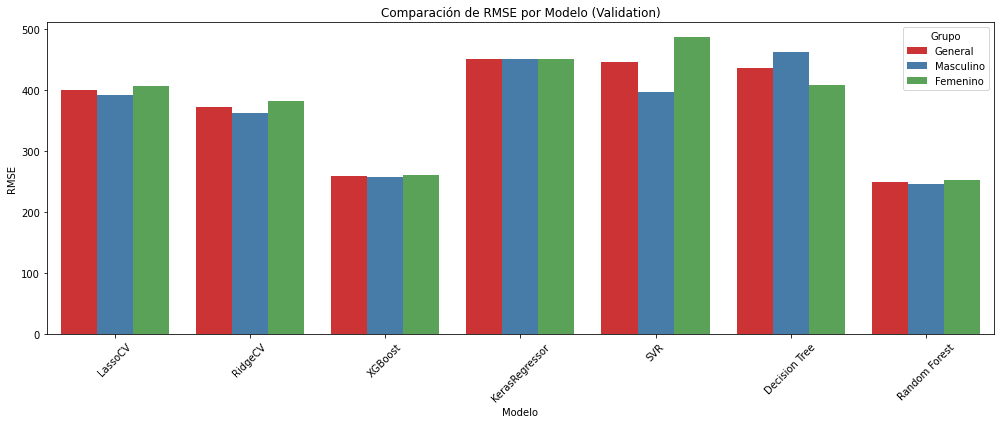

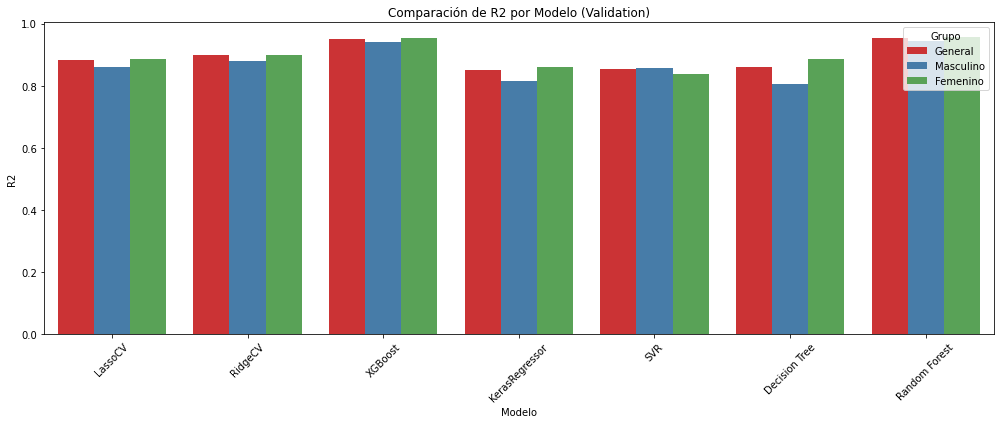

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que estos DataFrames estén cargados
# df_generales = ...
# df_genero_texto = ...

# Separar y copiar los subconjuntos
df_masculino = df_genero_texto[df_genero_texto['Modelo'].str.contains('Masculino')].copy()
df_femenino = df_genero_texto[df_genero_texto['Modelo'].str.contains('Femenino')].copy()
df_generales = df_generales.copy()  # Por si acaso

# Asignar el grupo correctamente
df_generales['Grupo'] = 'General'
df_masculino['Grupo'] = 'Masculino'
df_femenino['Grupo'] = 'Femenino'

# Extraer nombre base del modelo
modelo_regex = r'(LassoCV|RidgeCV|XGBoost|KerasRegressor|SVR|Decision Tree|Random Forest)'

df_generales['Modelo_Base'] = df_generales['Modelo'].str.extract(modelo_regex)
df_masculino['Modelo_Base'] = df_masculino['Modelo'].str.extract(modelo_regex)
df_femenino['Modelo_Base'] = df_femenino['Modelo'].str.extract(modelo_regex)

# Unir todo
df_total = pd.concat([df_generales, df_masculino, df_femenino], ignore_index=True)

# Colores para cada grupo
colores = {'General': 'steelblue', 'Masculino': 'forestgreen', 'Femenino': 'darkorange'}

# Métricas a graficar
metricas = ['mae', 'rmse', 'r2']

# Gráficas por métrica (Test)
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data = df_total[
    (df_total['Tipo'] == 'Validation') |
    (df_total['Tipo'] == 'Ridge Validation') |
    (df_total['Tipo'] == 'Lasso Validation')
],
        x='Modelo_Base',
        y=metrica,
        hue='Grupo',
        palette="Set1"
    )
    plt.title(f'Comparación de {metrica.upper()} por Modelo (Validation)')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Grupo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
df_total

,Modelo,Tipo,mae,mse,rmse,r2,Grupo,Modelo_Base
0,LassoCV Train,Train,320.088569,166844.662646,408.466232,0.874764,General,LassoCV
1,LassoCV Test,Test,382.120656,330819.112875,575.168769,0.810895,General,LassoCV
2,LassoCV Validation,Validation,305.827897,159393.706991,399.241414,0.882550,General,LassoCV
3,RidgeCV Train,Train,302.298965,145247.893149,381.114016,0.890975,General,RidgeCV
4,RidgeCV Test,Test,371.273256,340572.355921,583.585774,0.805320,General,RidgeCV
5,RidgeCV Validation,Validation,291.740687,139033.951037,372.872567,0.897552,General,RidgeCV
6,XGBoost Train,Train,0.002074,0.000010,0.003107,1.000000,General,XGBoost
7,XGBoost Test,Test,228.225244,380221.941116,616.621392,0.782655,General,XGBoost
8,XGBoost Validation,Validation,99.609350,66943.962555,258.735314,0.950672,General,XGBoost
9,KerasRegressor Train,Train,263.153757,155871.368039,394.805481,0.883000,General,KerasRegressor


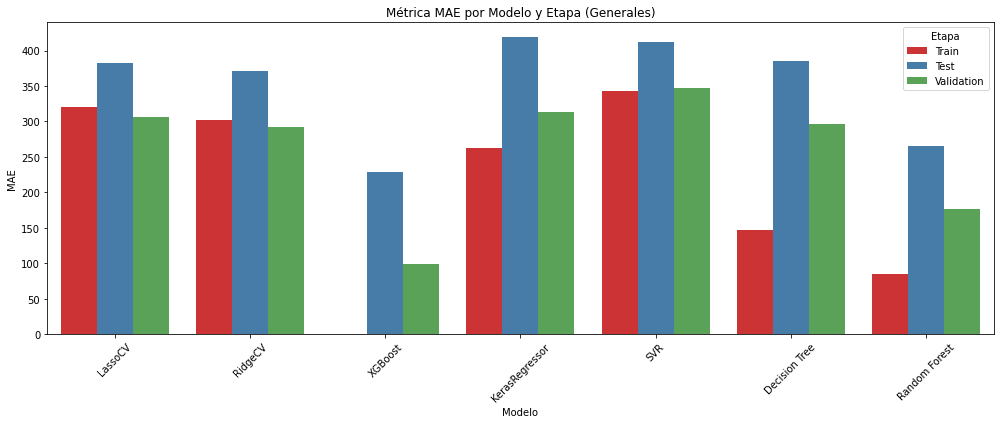

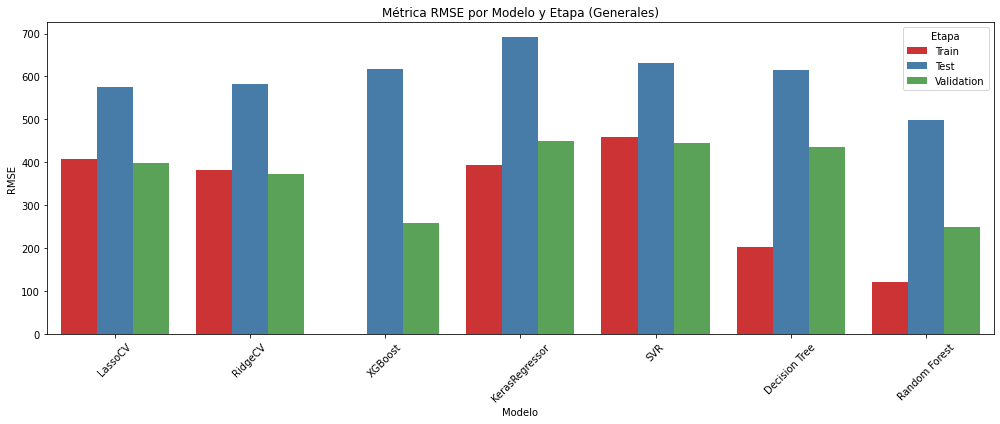

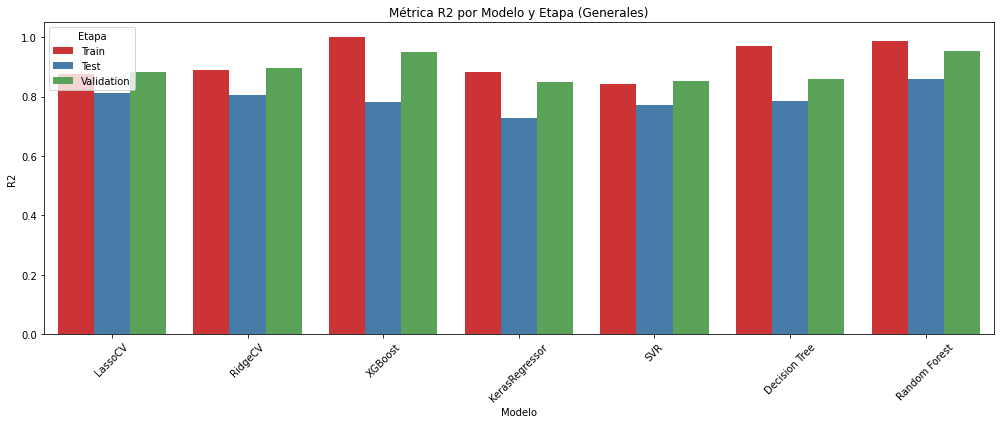

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo datos generales por etapa
df_generales_etapas = df_total[
    (df_total['Grupo'] == 'General') &
    (df_total['Tipo'].isin(['Train', 'Test', 'Validation']))
]

# Métricas a graficar
metricas = ['mae', 'rmse', 'r2']

# Gráficas por métrica
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_generales_etapas,
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'Métrica {metrica.upper()} por Modelo y Etapa (Generales)')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


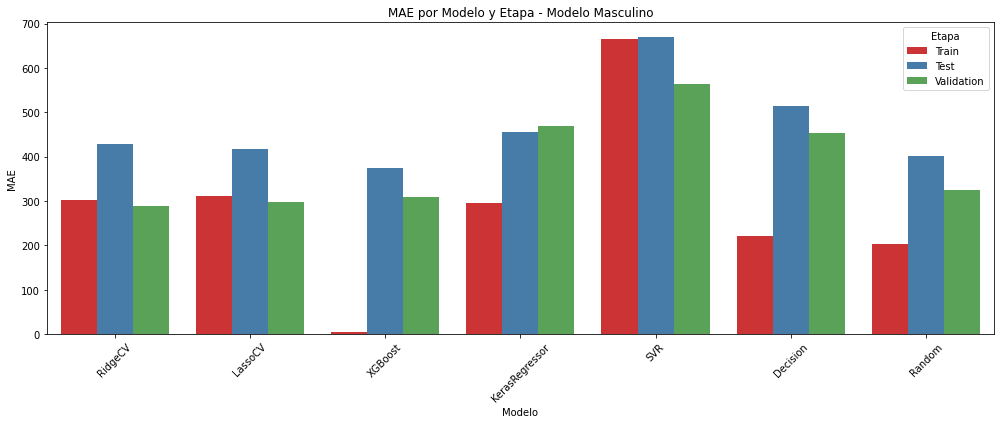

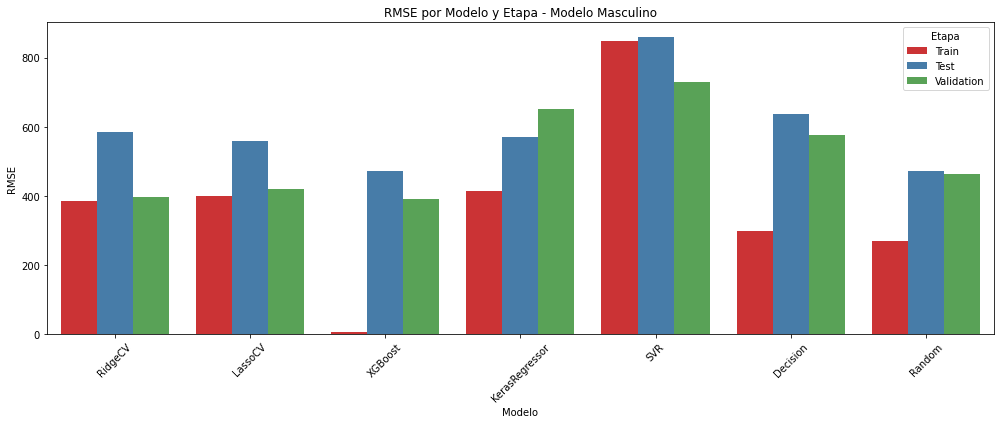

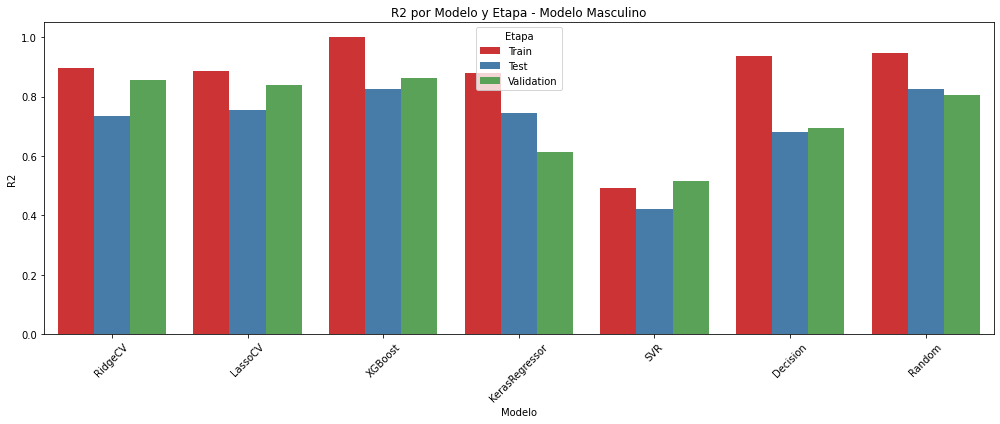

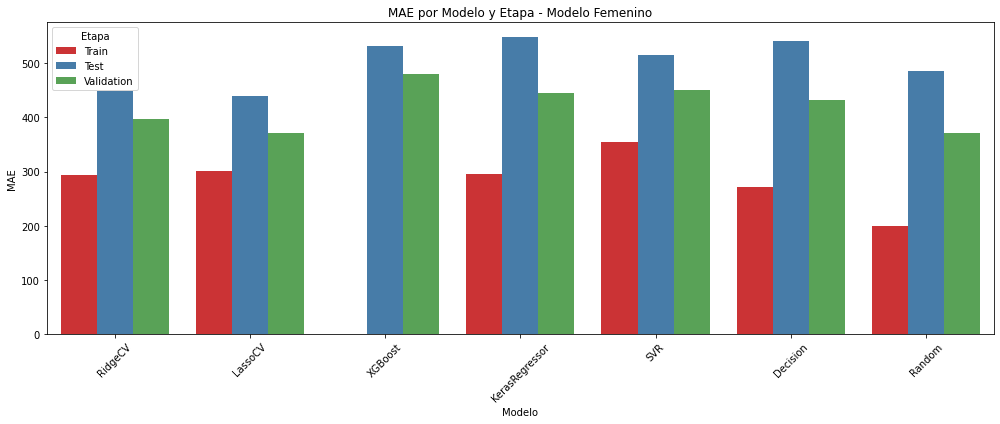

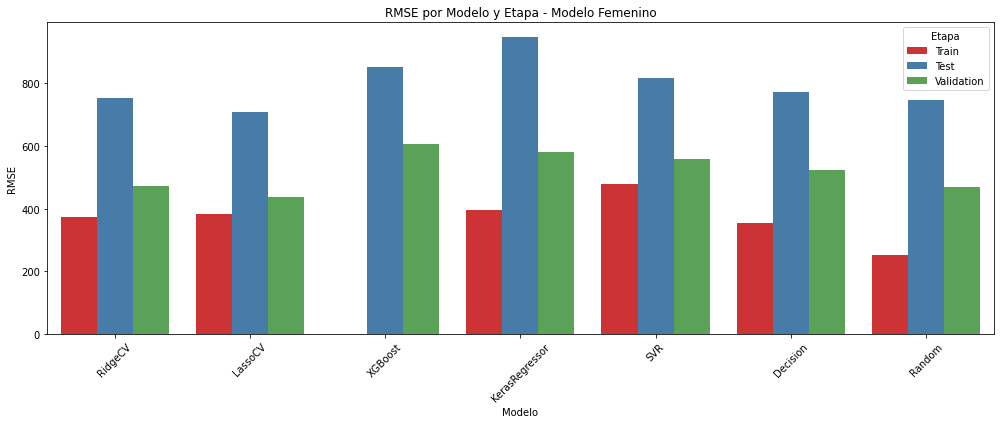

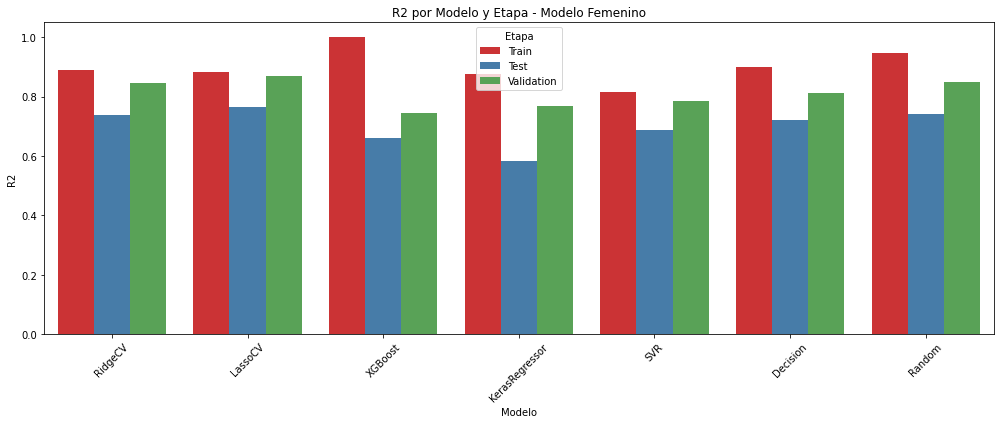

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los modelos por género
df_m = df_genero_guionbajo[df_genero_guionbajo['Modelo'].str.contains('_m', case=False)].copy()
df_f = df_genero_guionbajo[df_genero_guionbajo['Modelo'].str.contains('_f', case=False)].copy()

# Extraer nombre base del modelo
df_m['Modelo_Base'] = df_m['Modelo'].str.extract(r'^([A-Za-z]+)')
df_f['Modelo_Base'] = df_f['Modelo'].str.extract(r'^([A-Za-z]+)')

# Definir métricas
metricas = ['mae', 'rmse', 'r2']

# --------- GRÁFICAS PARA MODELOS MASCULINOS (_m) ---------
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_m[df_m['Tipo'].isin(['Train','Test', 'Validation'])],
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'{metrica.upper()} por Modelo y Etapa - Modelo Masculino')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --------- GRÁFICAS PARA MODELOS FEMENINOS (_f) ---------
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_f[df_f['Tipo'].isin(['Train','Test', 'Validation'])],
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'{metrica.upper()} por Modelo y Etapa - Modelo Femenino')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
from collections import defaultdict

# Función para clasificar por rango de edad
def dias_a_rango(dias):
    años = dias // 365
    if años <= 2:
        return "0-2"
   # if años <= 4:
    #    return "3-4"
    #if años <= 6:
     #   return "5-6"
    if años <= 8:
        return "3-8"
    #elif años <= 10:
     #   return "9-10"
    #if años <= 12:
     #   return "11-12"

    elif años <= 14:
        return "9-14"
    ##if años <= 16:
        return "15-16"
    elif años <= 18:
        return "15-18"
    else:
        return "19+"

# Función para separar por rango
def separar_por_rango(x, y):
    subconjuntos = defaultdict(lambda: {"x": [], "y": []})
    
    for xi, yi in zip(x, y):
        #print(f"Edad: {yi} días, Rango: {dias_a_rango(yi)}")
        rango = dias_a_rango(yi)
        subconjuntos[rango]["x"].append(xi)
        subconjuntos[rango]["y"].append(yi)
    
    return subconjuntos

subconjuntos = separar_por_rango(x_train, y_train)

for rango, datos in subconjuntos.items():
    print(f"Rango {rango} - Cantidad: {len(datos['y'])}")
    y_validation_pred=lasso_cv_f.predict(datos['x'])
    calcular_metricas(y_validation_pred,datos['y'], conjunto='AGE', model='Lasso_cv age')

Rango 9-14 - Cantidad: 94
--- Métricas para AGE ---
MAE:  298.8166
MSE:  146958.1668
RMSE: 383.3512
R²:   0.6213

Rango 3-8 - Cantidad: 51
--- Métricas para AGE ---
MAE:  258.8992
MSE:  102183.4440
RMSE: 319.6615
R²:   0.6790

Rango 15-18 - Cantidad: 11
--- Métricas para AGE ---
MAE:  504.9804
MSE:  339360.2652
RMSE: 582.5464
R²:   -1.3703



In [ ]:
y_validation_pred=mlp_g.predict(x_train)
calcular_metricas(y_train, y_validation_pred, conjunto='AGE', model='Lasso_cv age')

--- Métricas para AGE ---
MAE:  316.4108
MSE:  162286.7060
RMSE: 402.8482
R²:   0.8698



In [ ]:
print(selected_features_g)

                                              Feature  Coefficient
1                              Edad Cronológica(días)   964.238892
0                                        Género(0; 1)   108.169549
4              original_shape_Maximum2DDiameterColumn    83.407066
20                        original_firstorder_Maximum   -67.438413
18             original_firstorder_InterquartileRange    64.954244
10                          original_shape_Sphericity   -50.812108
79     original_glszm_SizeZoneNonUniformityNormalized    48.849767
5                 original_shape_Maximum2DDiameterRow    30.422783
19                       original_firstorder_Kurtosis    24.637733
76       original_glszm_LargeAreaLowGrayLevelEmphasis    22.608945
78               original_glszm_SizeZoneNonUniformity    17.329381
94  original_gldm_LargeDependenceHighGrayLevelEmph...    -7.653452
45                                 original_glcm_Imc2    -7.306769
75      original_glszm_LargeAreaHighGrayLevelEmphasis    -6.38

In [ ]:
print(len(selected_features_g))

16


In [ ]:
print(selected_features_m)

                                              Feature  Coefficient
1                              Edad Cronológica(días)   965.459888
78               original_glszm_SizeZoneNonUniformity   123.644250
12                  original_shape_SurfaceVolumeRatio   114.093222
34                    original_glcm_ClusterProminence  -111.940921
10                          original_shape_Sphericity  -105.823279
18             original_firstorder_InterquartileRange   105.179317
20                        original_firstorder_Maximum   -94.451993
4              original_shape_Maximum2DDiameterColumn    86.274584
19                       original_firstorder_Kurtosis    70.661252
86                    original_gldm_DependenceEntropy    59.661995
0                                        Género(0; 1)    54.482189
14                   original_firstorder_10Percentile   -48.592575
94  original_gldm_LargeDependenceHighGrayLevelEmph...   -47.944741
85                        original_glszm_ZoneVariance    32.27

In [ ]:
print(len(selected_features_m))

17


In [ ]:
print(selected_features_f)

                                              Feature  Coefficient
1                              Edad Cronológica(días)   952.108058
0                                        Género(0; 1)   137.022887
18             original_firstorder_InterquartileRange   103.816262
10                          original_shape_Sphericity   -54.438524
19                       original_firstorder_Kurtosis    48.085982
4              original_shape_Maximum2DDiameterColumn    42.199145
95  original_gldm_LargeDependenceLowGrayLevelEmphasis    41.932147
75      original_glszm_LargeAreaHighGrayLevelEmphasis   -34.442733
5                 original_shape_Maximum2DDiameterRow    27.544520
20                        original_firstorder_Maximum   -18.669021
88    original_gldm_DependenceNonUniformityNormalized    12.637558
47                                 original_glcm_Idmn     6.239190
76       original_glszm_LargeAreaLowGrayLevelEmphasis     1.358393
85                        original_glszm_ZoneVariance     0.83

In [ ]:
print(len(selected_features_f))

14
